In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.2
numpy version: 1.24.1
seaborn version: 0.12.2


### use axample data from "An Introduction to Statistical Learning" 
- Teach by Aj.Prasert by using avertising.csv file

In [4]:
df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


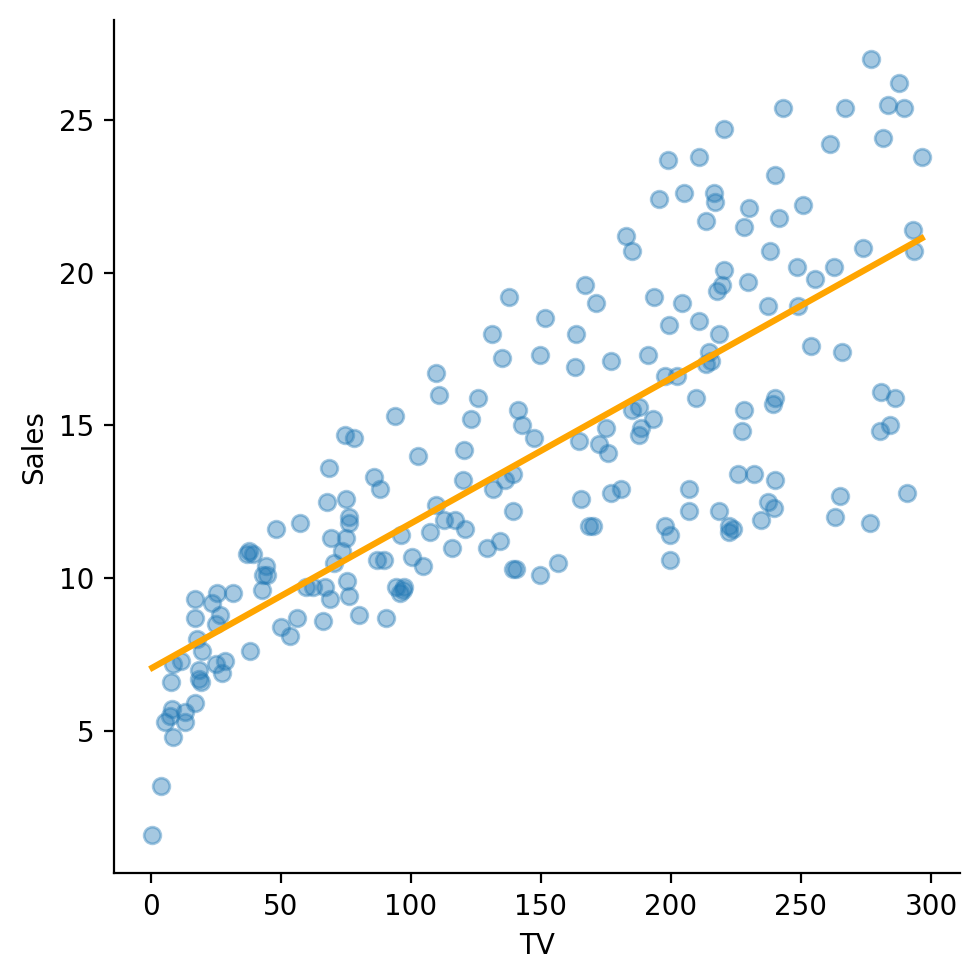

In [7]:
# plot relationship using linear model to see between sale and tv

sns.lmplot(data = df, x = 'TV', y = 'Sales', ci = None, scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'orange'})

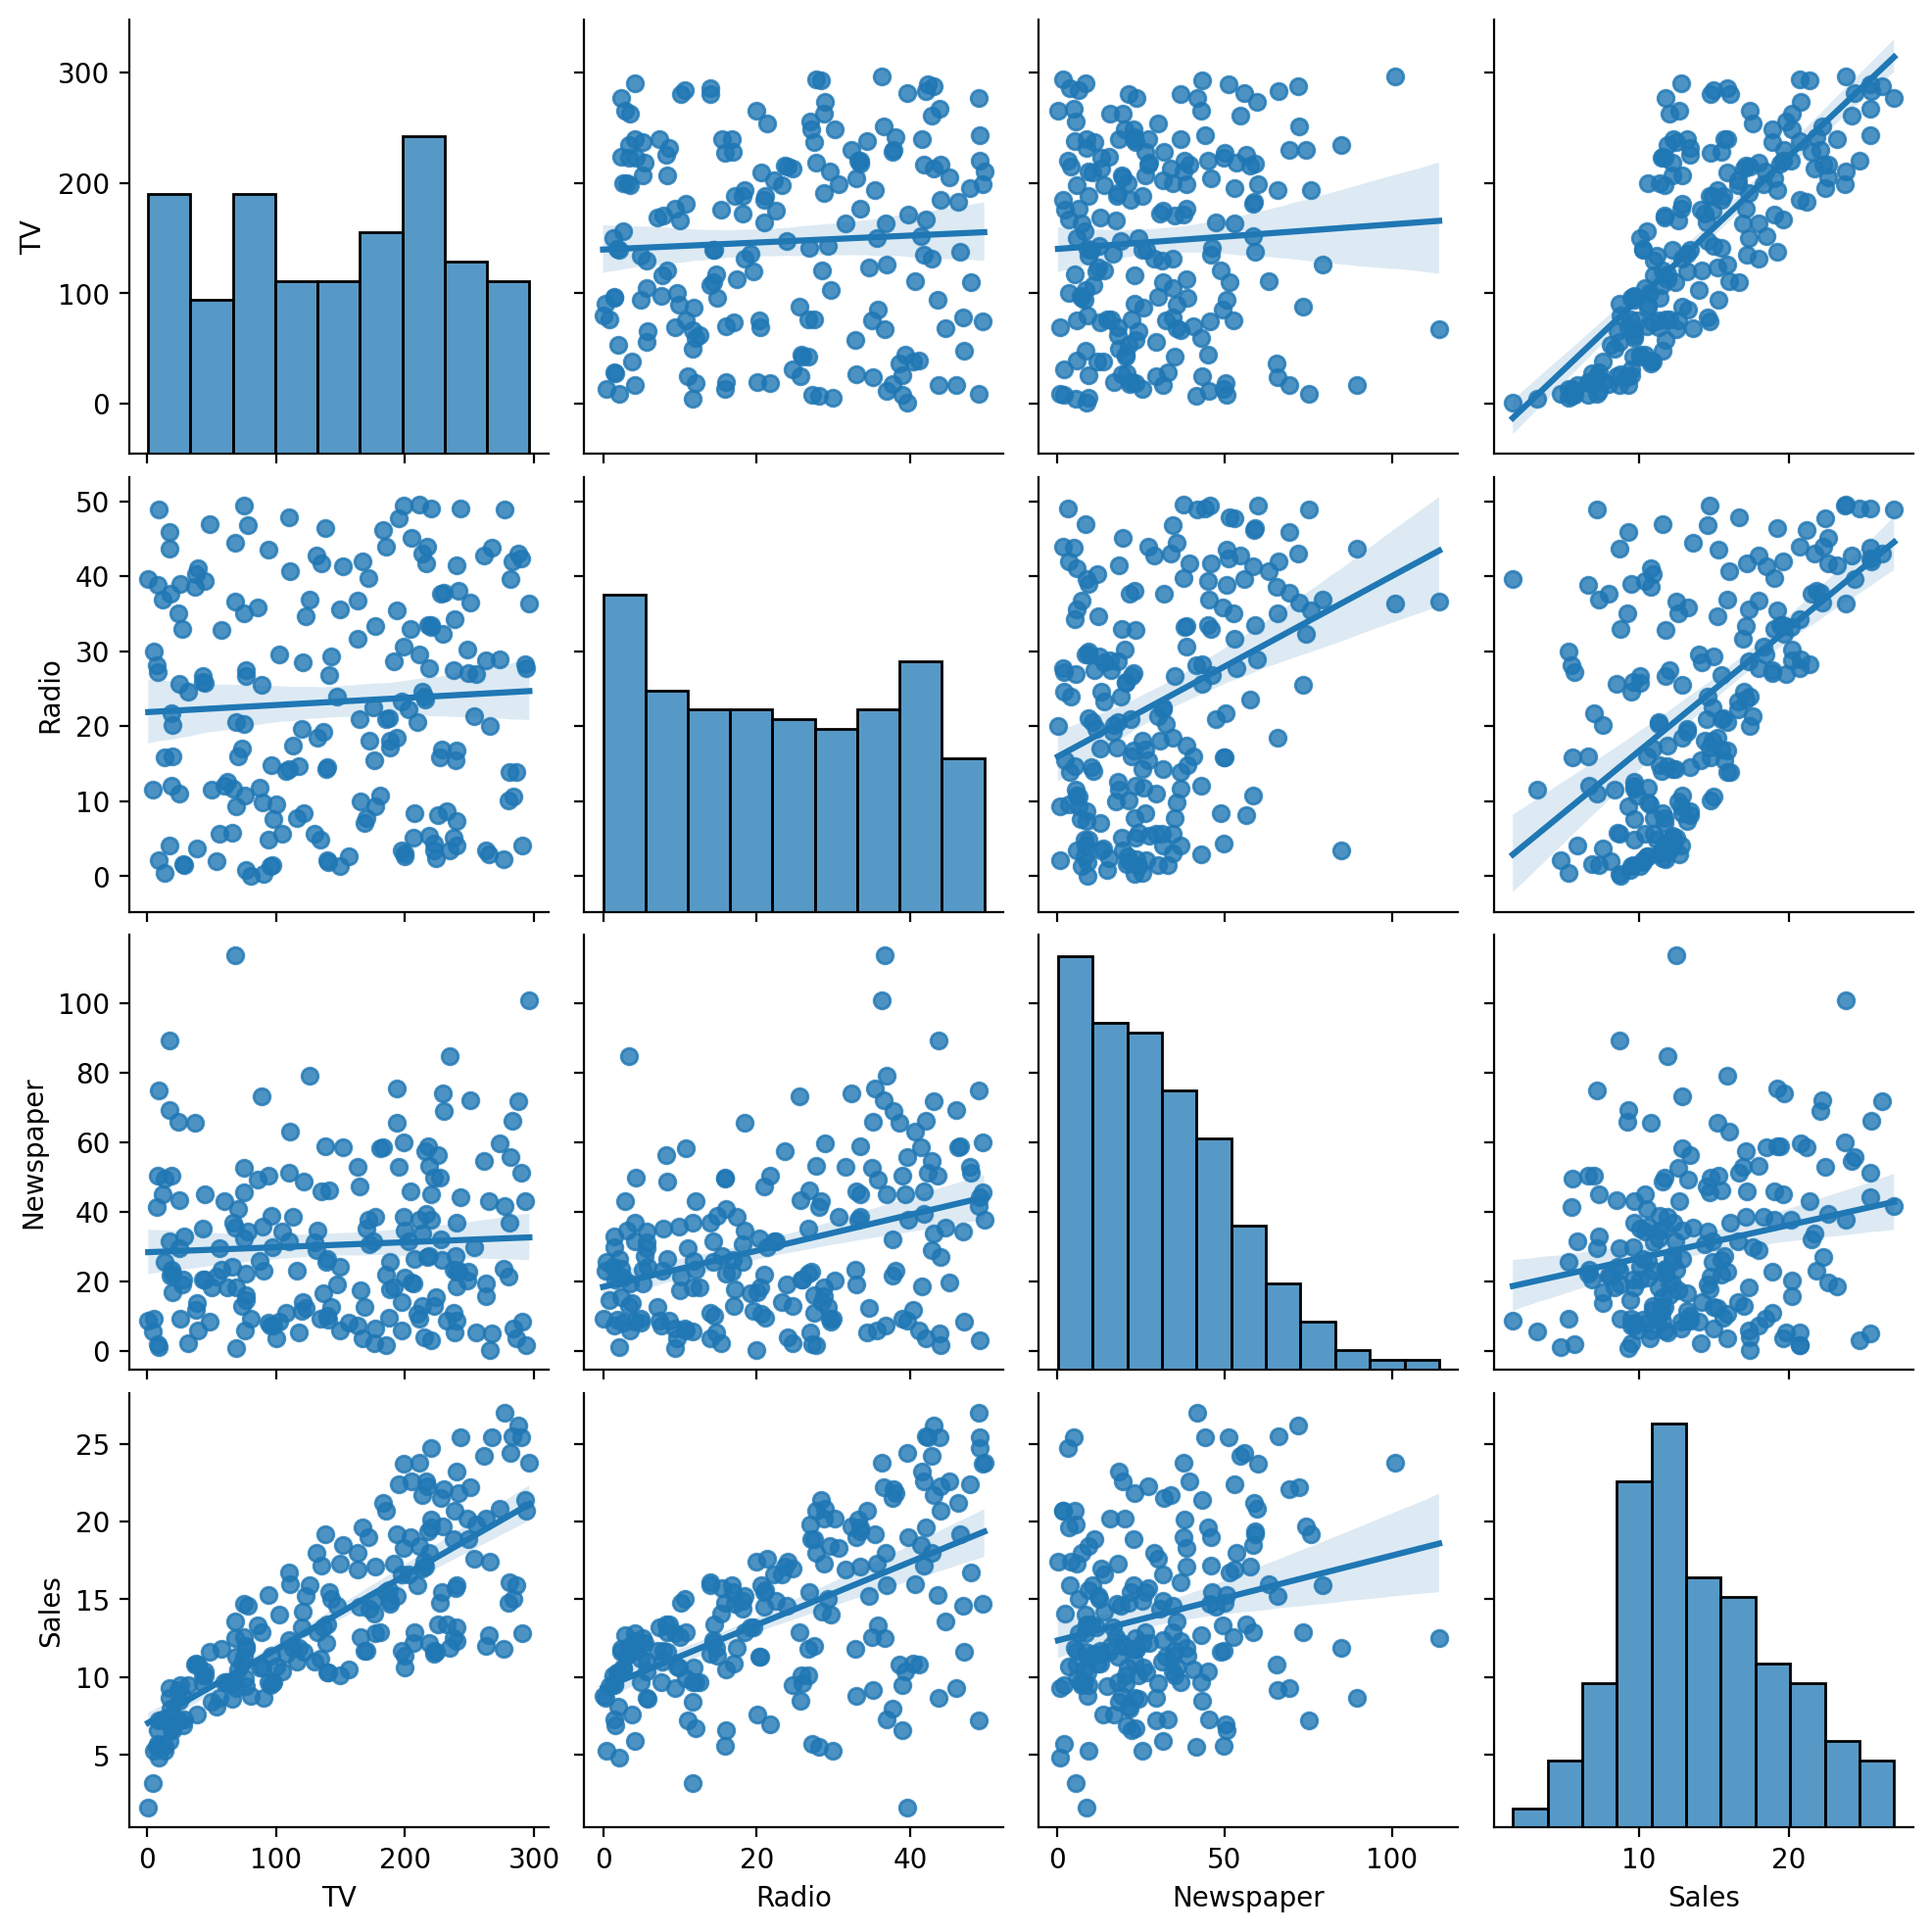

In [8]:
# as we have only 4 variables, so let's see the pair plot

sns.pairplot(df, kind = 'reg')

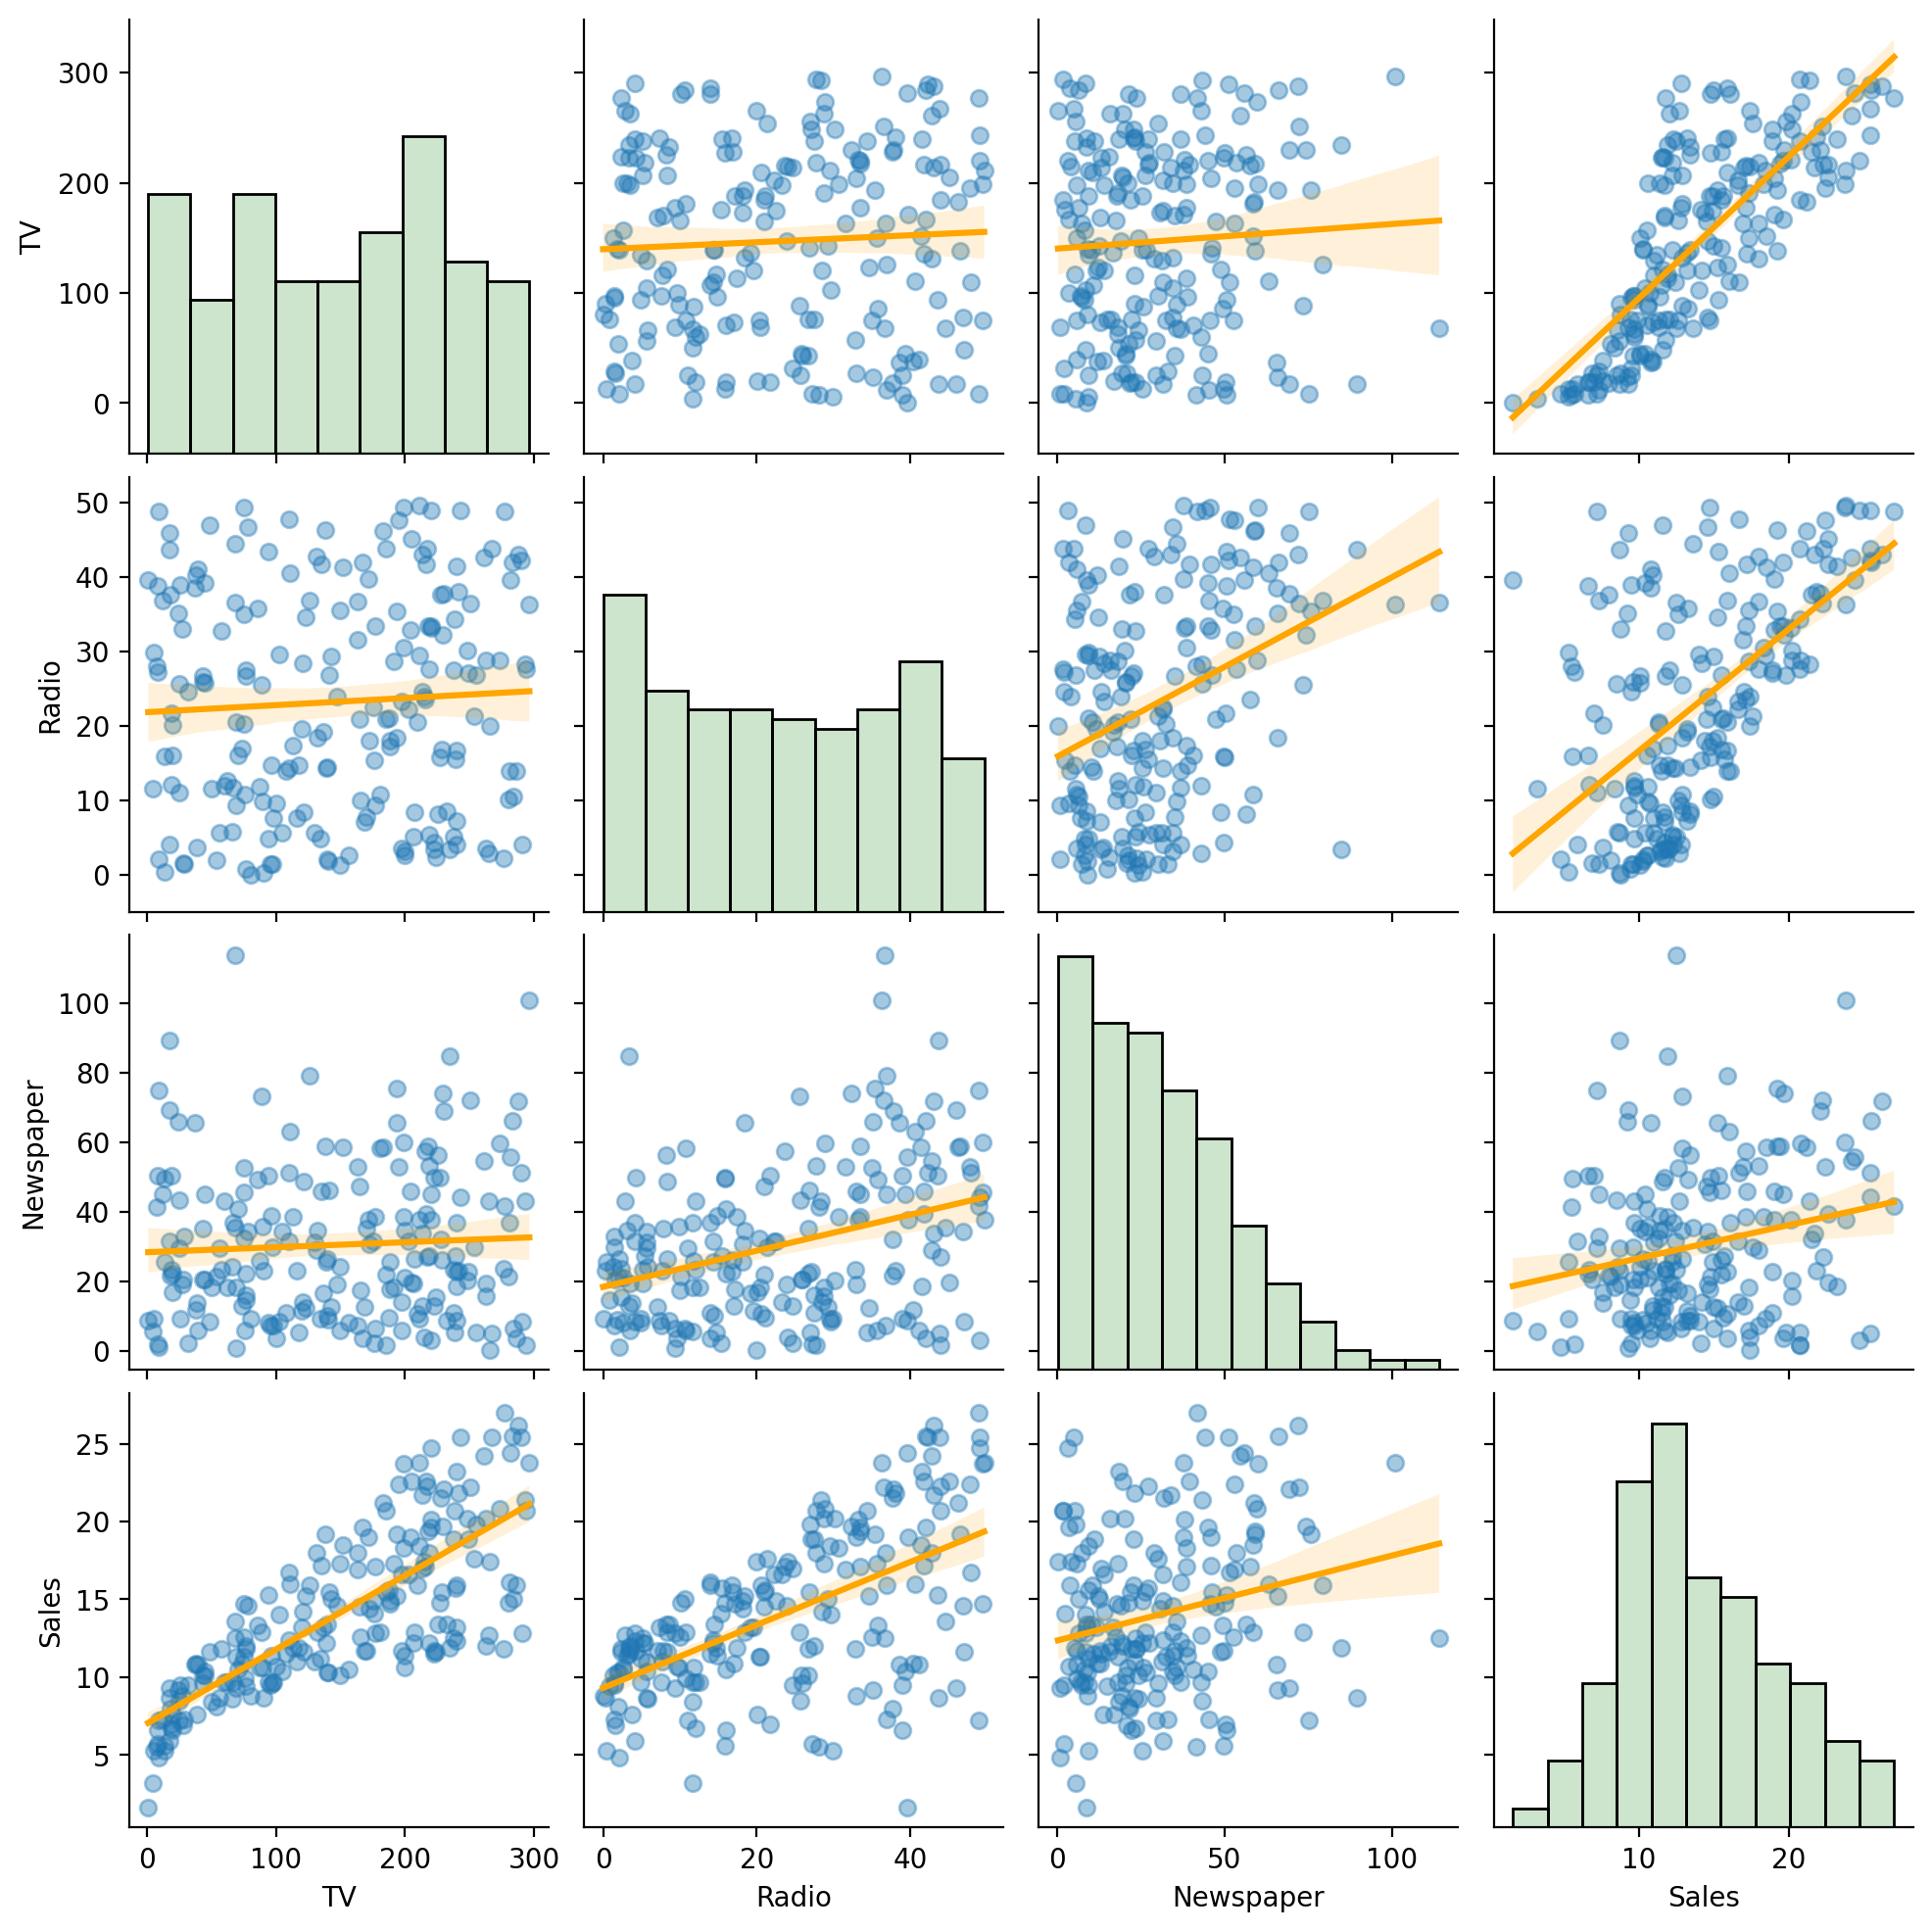

In [9]:
sns.pairplot(df, kind = 'reg', plot_kws = {'scatter_kws': {'alpha': 0.4}, 'line_kws': {'color': 'orange'}}, diag_kws = {'color': 'green', 'alpha': 0.2});

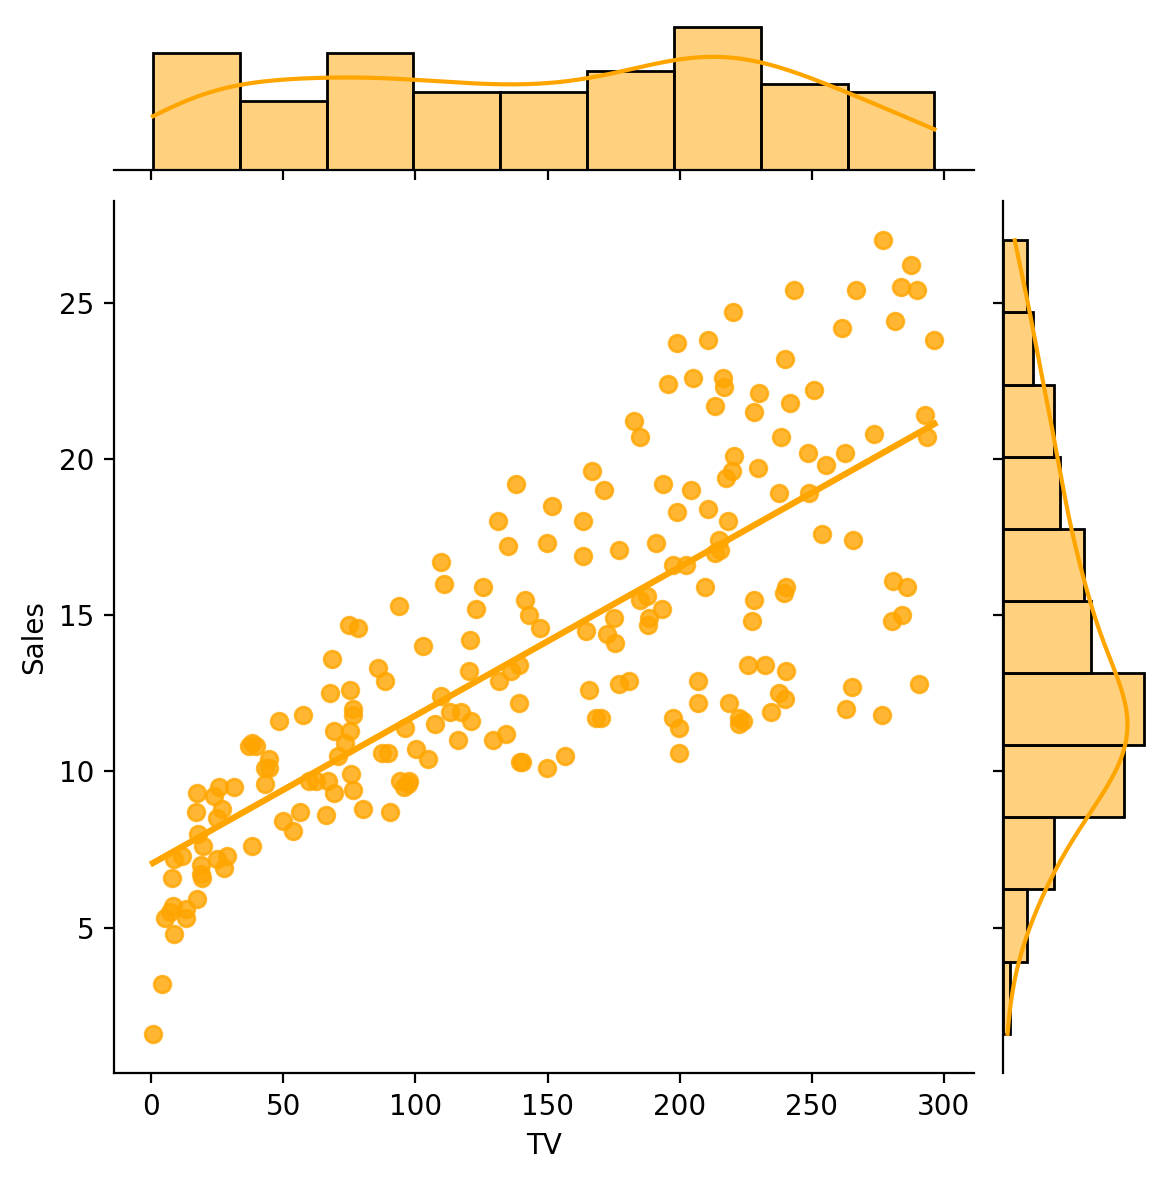

In [10]:
sns.jointplot(data = df, x = 'TV', y = 'Sales', kind = 'reg', ci = None, color = 'orange')